# Informe Tarea 2: Aprendizaje bayesiano

Martín Beiro

Julián Rodríguez

## Predictor Bayesiano

Para el laboratorio 2 de Aprendizaje Automático, se pide implementar un predictor bayesiano de palabras, como los que se usa en los motores de búsqueda o teclados de los teléfonos. Dadas las N palabras previas (hiperparámetro del predictor), se deberá recomendar la siguiente palabra, habiendo entrenado el sistema con conversaciones recolectadas de grupos de Whatsapp.



### Recolección y pre procesamiento de datos

Se descargaron las conversaciones de un grupo de Whatsapp con al rededor de 43000 mensajes. Estas quedaron disponibles desde la aplicación en texto plano (.txt) y fueron cargadas en pandas, descartando los campos de autor y fecha del mensaje. Cabe destacar que los archivos proporcionados por IOS y Android tienen leves diferencias en formato, por lo que el código de carga diferencia entre los dos. Luego se pasó a eliminar encabezados, emoticones, mensajes que indicaban que en ese punto de la conversación habia contenido multimedia y números




In [ ]:
from preprocess import load_wpp_data
WPP_FILENAME='Datos/chat_big.txt'

data=load_wpp_data(WPP_FILENAME)


#### Diccionario

Para mejorar el desempeño del predictor (tanto en tiempo como en su predicción)  fue necesario limitar el vocabulario admitido. Se incluye un diccionario de español, que se utiliza para el filtrado.

In [ ]:
SPANISH_DICT_FILENAME='Datos/es.txt'
with open(SPANISH_DICT_FILENAME, 'r', encoding='utf-8') as archivo:
    palabras_validas=set()
    for linea in archivo:
        palabra = linea.strip()
        palabras_validas.add(palabra)

### Algoritmo

Dadas N palabras, se debe predecir la siguiente. Para ejemplificar, tomemos 4 palabras previas u horizonte. Si el usuario por ejemplo escribió "feliz cumple que pases" el sistema debería recomendar "lindo". Esperamos entonces que sea "lindo" el valor donde se maximice 

$$p(hipotesis)*p(feliz/hipotesis)*p(feliz/hipotesis)*p(feliz/hipotesis)*p(feliz/hipotesis)$$

para todas las opciones de nuestro vocabulario.

Con el fin de mejorar el predictor ante casos en los que p(horizonte/hipotesis) sea cero, se introduce el m_estimador visto en el curso. Este busca crear muestras ficticias, tantas como se especifique en el parametro m.

m_estimador=$$\frac{e+m*p}{(n+m)}$$

siendo e la cantidad de ejemplos que reafirman hipotesis con una palabra horizonte, m la cantidad de muestras que queremos "agregar",
n el total de ejemplos de la hipotesis y p 1/|vocabulario|



### Implementación

Se utilizaron dos diccionarios para contener el conjunto de datos. 
El primer diccionario, "priori" contiene la frecuencia de cada palabra
El segundo, "posteriori" tiene para cada palabra del vocabulario, la frecuencia de las palabras que estuvieron en su horizonte

Estos dos primeros diccionarios se utilizan para generar el tercero que contiene los estimadores para cada combinacion de palabras en "posteriori" y un campo extra para la probabilidad de palabras que no se hayan visto junto a la hipotesis antes (_default, o P_nada en el curso)

La ventaja de almacenar estos dos diccionarios intermedios es que, para actualizar los datos luego de cada frase completa, solo es necesario actualizar los m-estimadores de las palabras hipotesis relacionadas, agilizando la actualización

## Evaluación

### Hiperparámetro N

Para evaluar los modelos se toma el conjunto de datos y se lo separa en *train* y *test* usando la librería *scikit-learn*.
Se entrena el modelo con el conjunto *train* variando el hiperparámetro N (con valores 1, 2, 3 y 4) y obteniendo cuatro predicotres diferentes. Posteriormente se usan las frases del conjunto *test* para la predicción.
Para la evaluación se toma un criterio de precisión con respecto a los aciertos del predictor. Para cada frase del conjutno *test*, se itera a través de las palabras para ir consiguiendo las predicciones. Luego se comparara la predicción con la palabra que efectivamente seguía en la frase.

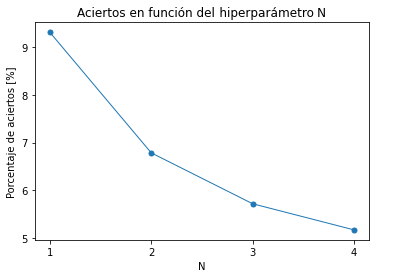

En la imagen anterior se observa como el porcenaje de aciertos disminuye a medida que aumenta N. El resultado es contraintuitivo ya que era de esperarse que al tener un mejor contexto, la predicción sería mejor. Sin embargo, al observar únicamente la palabra anterior se obtienen mejores resultados.

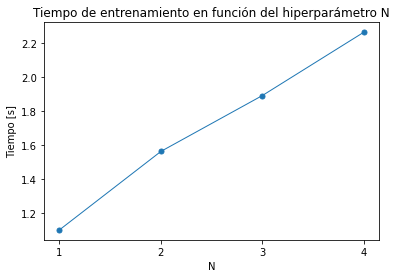

Observando el tiempo que tarda en entrenar cada predictor, era de esperarse que a mayor N mayor tiempo. En este caso la relación tiene un aspecto lineal con respecto a N. 

A priori se podría pensar que las palabras acertadas por el predictor tienen mayor frecuencia en el conjunto de datos con respecto a las predicciones con error, por lo que se grafica la media y la desviación estándar de las frecuencias de las palabras entregadas por el predictorcon N=1.

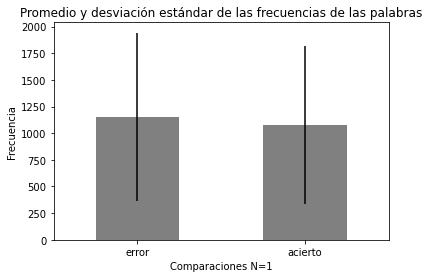

Se observa que las medias de las frecuencias son similares, e incluso la media de las frecuencais en el conjunto de datos de las palabras acertadas es un poco menor que la de los errores.
Es interesante ver la distribución de estas frecuencias, por lo que se realiza un gráfico de violín.


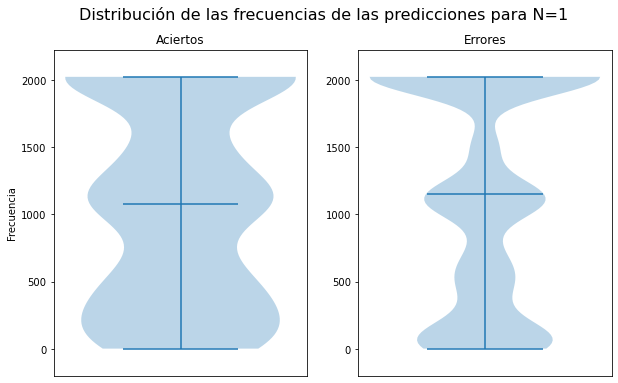


En le gráfico anterior no se observa una diferencia sustancial en la distribución de las frecuencias. Esto lleva a pensar que los aciertos se dan tanto con palabras poco frecuentes asi como con palabras muy frecuentes.
Se puede graficar lo mismo pero para el hiperprámetro N=4.

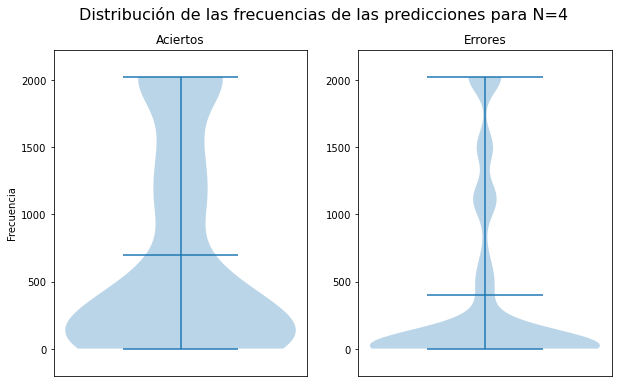


No se observan diferencias cualitativas importantes entre ambos gráficos considerando que un grupo tiene menor cantidad de datos, pero sí resulta interesante notar como los gráficos de violín para N=4 se ensachan en la parte inferior con respecto a los de N=1.
Para poder observar con mejor detalle este comportamiento, se grafica el promedio de las frecuencias de las palabras que arroja el predictor para cada N.

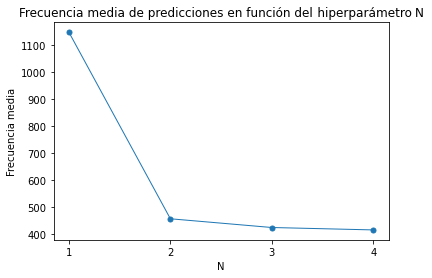

La característica a resaltar es que la frecuencia media de las palabras entregadas por el predictor decae en función de N. Es interesante notar como palabras muy frecuentes son ponderadas a la baja a medida que el resultado tiene más factores multiplicando.
En conclusión, para el conjunto de datos trabajdos y los modelos propouestos, la utilización del hiperpámetro N=1 se ejecuta en un menor tiempo, entregando mejores resultados. 

### Hiperparámetro m
Se puede variar el parámetro m del m-estimador para ver como inciden en los resultados

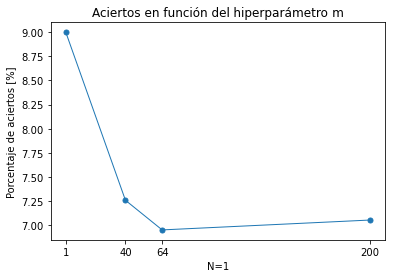

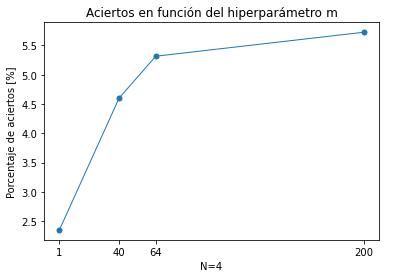

En le gráfico se observa como los aciertos decaen a medida que se aumenta m. Para N=4 el efecto del parámetro m es el inverso, mejorando los aciertos conforme crece el parámetro. Esto se explica a priori porque la posibilidad de que algun termino se anule cuando tenemos 4 probabilidades condicionadas con distintas palabras horizonte es mayor, anulando opciones que podrían ser las correctas


## Cliente
Inicializamos la clase del estimador, estableciendo los hiperparametros.

In [ ]:
from bayes import BayesPredictor
HORIZONTE=4
m=2
predictor=BayesPredictor(data["palabras"],HORIZONTE,m,palabras_validas)
print(predictor.vocab())

In [ ]:


def recomendacion_bayesiana(frase):
  

  return predictor.predict(frase)



##### LOOP PRINCIPAL #####

print("Ingrese la frase dando ENTER luego de \x1b[3mcada palabra\x1b[0m.")
print("Ingrese sólo ENTER para aceptar la recomendación sugerida, o escriba la siguiente palabra y de ENTER")
print("Ingrese '.' para comenzar con una frase nueva.")
print("Ingrese '..' para terminar el proceso.")

frase = []
palabra_sugerida = ""
while 1:
    palabra = input(">> ")

    if palabra == "..":
        break

    elif palabra == ".":
        predictor.update(frase,solo_cambios=True)
            
        print("----- Comenzando frase nueva -----")
        frase = []

    elif palabra == "": # acepta última palabra sugerida
        frase.append(palabra_sugerida)

    else: # escribió una palabra
        frase.append(palabra)

    if frase:
        palabra_sugerida = recomendacion_bayesiana(frase)
    
        frase_propuesta = frase.copy()
        frase_propuesta.append("\x1b[3m"+ palabra_sugerida +"\x1b[0m")
    
        print(" ".join(frase_propuesta))

